In [1]:
import openmc
import openmc.stats
%matplotlib inline
from IPython.display import Image

In [2]:
uo2 = openmc.Material(material_id=1, name='UO2 2.4% enrichment')
uo2.set_density('g/cm3', 10.3)
uo2.add_nuclide('U235', 0.88*0.024, 'wo')
uo2.add_nuclide('U238', 0.88*(1-0.024), 'wo')
uo2.add_nuclide('O16', 0.12, 'wo')

In [3]:
water = openmc.Material(material_id=2, name='Water moderator')
water.set_density('g/cm3', 0.76)
water.add_nuclide('H1', 2.0)
water.add_nuclide('O16', 1.0)

In [4]:
materials_file = openmc.Materials([uo2, water])
materials_file.export_to_xml()

In [5]:
fuel_rad = openmc.ZCylinder(surface_id=1, x0=0, y0=0, R=0.4,
                            name='Fuel Radius')
left = openmc.XPlane(surface_id=2, x0=-.63, boundary_type='reflective',
                     name='left')
right = openmc.XPlane(surface_id=3, x0=.63, boundary_type='reflective',
                      name='right')
front = openmc.YPlane(surface_id=4, y0=-.63, boundary_type='reflective',
                      name='bottom')
back = openmc.YPlane(surface_id=5, y0=.63, boundary_type='reflective',
                     name='top')
bottom = openmc.ZPlane(surface_id=6, z0=-1.0, boundary_type='reflective',
                       name='bottom')
top = openmc.ZPlane(surface_id=7, z0=1.0, boundary_type='reflective',
                    name='top')

In [6]:
fuel = openmc.Cell(cell_id=1, name='fuel cell')
fuel.region = -fuel_rad & +bottom & -top
fuel.fill = uo2

mod = openmc.Cell(cell_id=2, name='water cell')
mod.region = +fuel_rad & +left & -right & +front & -back & +bottom & -top
mod.fill = water

In [7]:
root = openmc.Universe(universe_id=0, name='root universe')
root.add_cells([fuel, mod])
geometry = openmc.Geometry(root)
geometry.export_to_xml()

In [8]:
settings_file = openmc.Settings()
settings_file.batches = 100
settings_file.inactive = 20
settings_file.particles = 10000

bounds = [left.x0, front.y0, bottom.z0, right.x0, back.y0, top.z0]
uniform_dist = openmc.stats.Box(bounds[:3], bounds[3:],
                                only_fissionable=True)
settings_file.source = openmc.source.Source(space=uniform_dist)

settings_file.track = (1, 1, 1)

settings_file.export_to_xml()

In [9]:
plot = openmc.Plot(plot_id=1)
plot.filename = 'materials-xy'
plot.origin = [0, 0, 0]
plot.width = [1.26, 1.26]
plot.pixels = [250, 250]
plot.color = 'mat'

voxel = openmc.Plot(plot_id=2)
voxel.type = 'voxel'
voxel.filename = 'mats_3d'
voxel.origin = [0, 0, 0]
voxel.width = [1.26, 1.26, 2]
voxel.pixels = [250, 250, 250]
voxel.color = 'mat'

plot_file = openmc.Plots([plot, voxel])
plot_file.export_to_xml()

In [10]:
# Run openmc in plotting mode
openmc.plot_geometry(output=False)

0

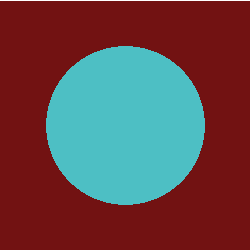

In [11]:
# Convert OpenMC's funky ppm to png
!convert materials-xy.ppm materials-xy.png

# Display the materials plot inline
Image(filename='materials-xy.png')

In [12]:
# Run OpenMC!
openmc.run()


                               %%%%%%%%%%%%%%%
                          %%%%%%%%%%%%%%%%%%%%%%%%
                       %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                     %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                  %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                   %%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                ###############      %%%%%%%%%%%%%%%%%%%%%%%%
               ##################     %%%%%%%%%%%%%%%%%%%%%%%
               ###################     %%%%%%%%%%%%%%%%%%%%%%%
               ####################     %%%%%%%%%%%%%%%%%%%%%%
               #####################     %%%%%%%%%%%%%%%%%%%%%
               ######################     %%%%%%%%%%%%%%%%%%%%
               #######################     %%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%

0